In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn 
patch_sklearn()
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = pd.read_csv('traces_data.csv',skiprows=1,names=['Timestamp','traceID','spanID','parentSpanID','serviceName','Name','durationNano','gRpc'],low_memory=False)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [3]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     183615 non-null  datetime64[ns]
 1   traceID       183615 non-null  object        
 2   spanID        183615 non-null  object        
 3   parentSpanID  141834 non-null  object        
 4   serviceName   183615 non-null  object        
 5   Name          183615 non-null  object        
 6   durationNano  183615 non-null  int64         
 7   gRpc          80498 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 11.2+ MB


In [4]:
df['gRpc'] = df['gRpc'].replace(np.nan,False)
df['gRpc'] = df['gRpc'].replace('grpc',True)

In [5]:
df.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,gRpc
0,2023-11-23 04:42:32.707303516,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,False
1,2023-11-23 04:42:32.707459680,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,False
2,2023-11-23 04:42:33.930086000,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,False
3,2023-11-23 04:42:36.928455000,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,False
4,2023-11-23 04:42:39.923633000,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,False


In [6]:
df.describe()

,Timestamp,durationNano
count,183615,1.836150e+05
mean,2023-11-23 03:28:13.200504576,5.414918e+06
min,2023-11-23 02:34:48.848999936,0.000000e+00
25%,2023-11-23 03:00:04.527859200,3.357000e+05
50%,2023-11-23 03:27:33.628999936,1.584906e+06
75%,2023-11-23 03:55:31.771000064,6.832718e+06
max,2023-11-23 04:59:36.766831067,4.999858e+09
std,NaN,2.077879e+07


# EDA:

### Histrogram of Duration

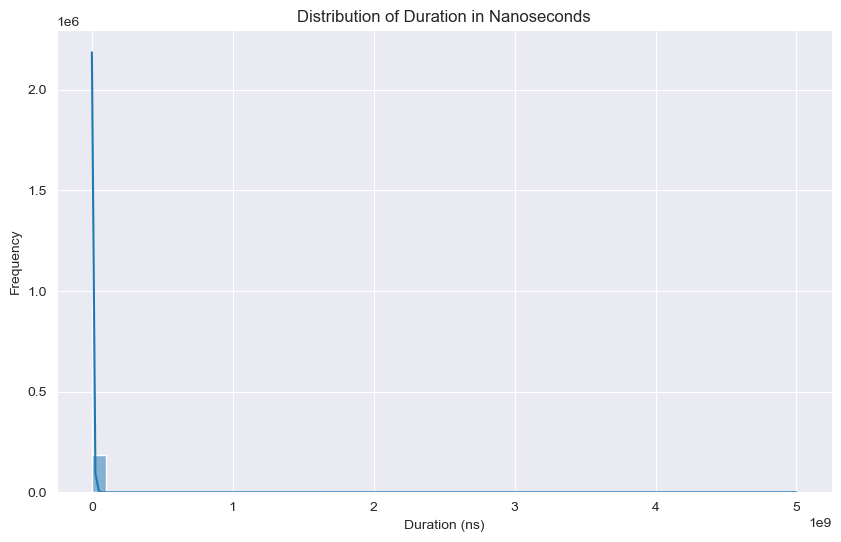

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['durationNano'], bins=50, kde=True)
plt.title('Distribution of Duration in Nanoseconds')
plt.xlabel('Duration (ns)')
plt.ylabel('Frequency')
plt.show()

### Scattere plot with index to check the outliers

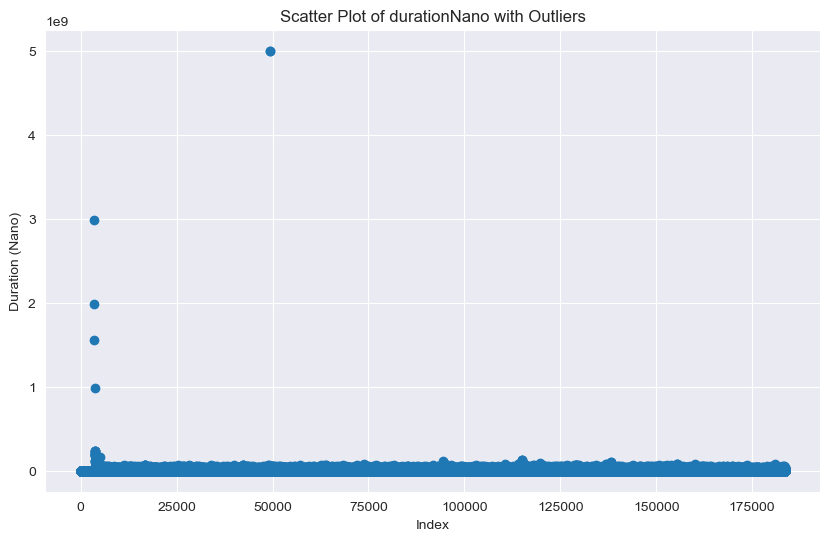

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['durationNano'])
plt.xlabel('Index')
plt.ylabel('Duration (Nano)')
plt.title('Scatter Plot of durationNano with Outliers')
plt.show()


## Count and mean duration with unique service Name with a joint plot to check the distribution of mean duration and the count of service Name

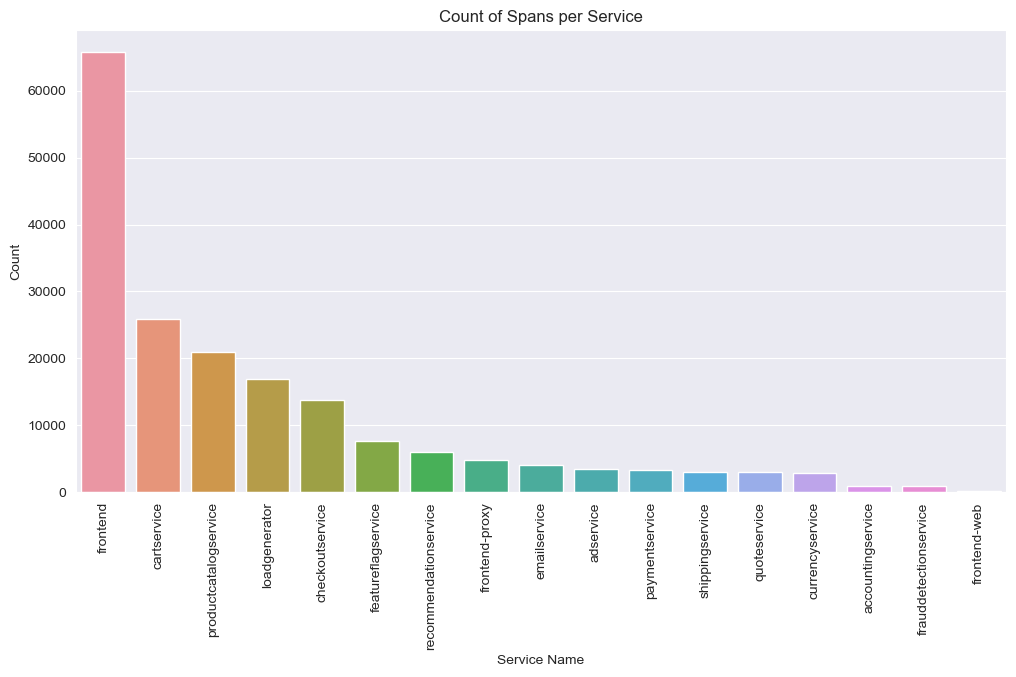

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='serviceName', order=df['serviceName'].value_counts().index)
plt.title('Count of Spans per Service')
plt.xlabel('Service Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


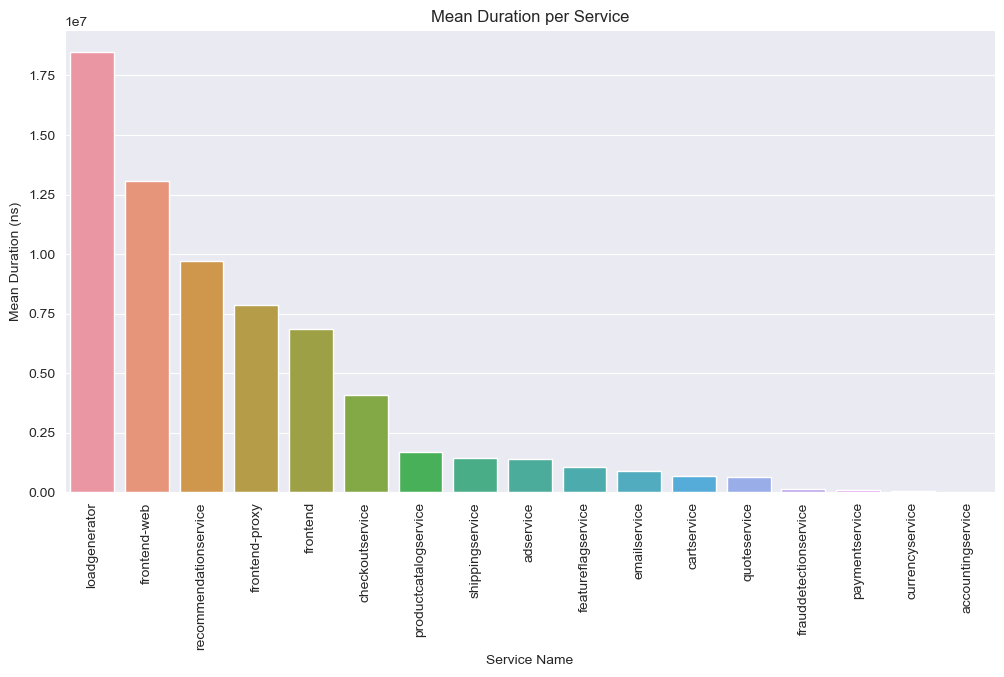

In [10]:
service_duration = df.groupby('serviceName')['durationNano'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=service_duration, x='serviceName', y='durationNano', order=service_duration.sort_values(by='durationNano', ascending=False)['serviceName'])
plt.title('Mean Duration per Service')
plt.xlabel('Service Name')
plt.ylabel('Mean Duration (ns)')
plt.xticks(rotation=90)
plt.show()

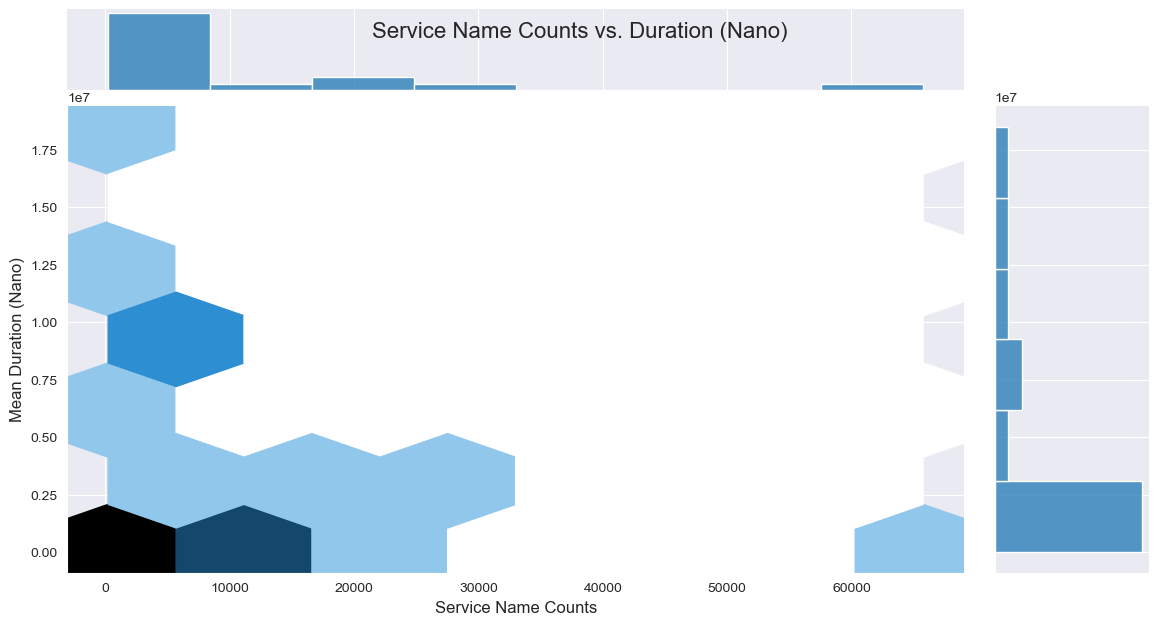

In [11]:
p = sns.jointplot(x=df['serviceName'].value_counts().values,y=service_duration['durationNano'].values,kind='hex')
p.fig.set_size_inches(12, 6)
p.fig.suptitle('Service Name Counts vs. Duration (Nano)', fontsize=16)
p.fig.subplots_adjust(top=1)
p.set_axis_labels('Service Name Counts', 'Mean Duration (Nano)', fontsize=12)
plt.show()

## Count and mean duration with unique Name with a joint plot to check the distribution of mean duration and the count of Name

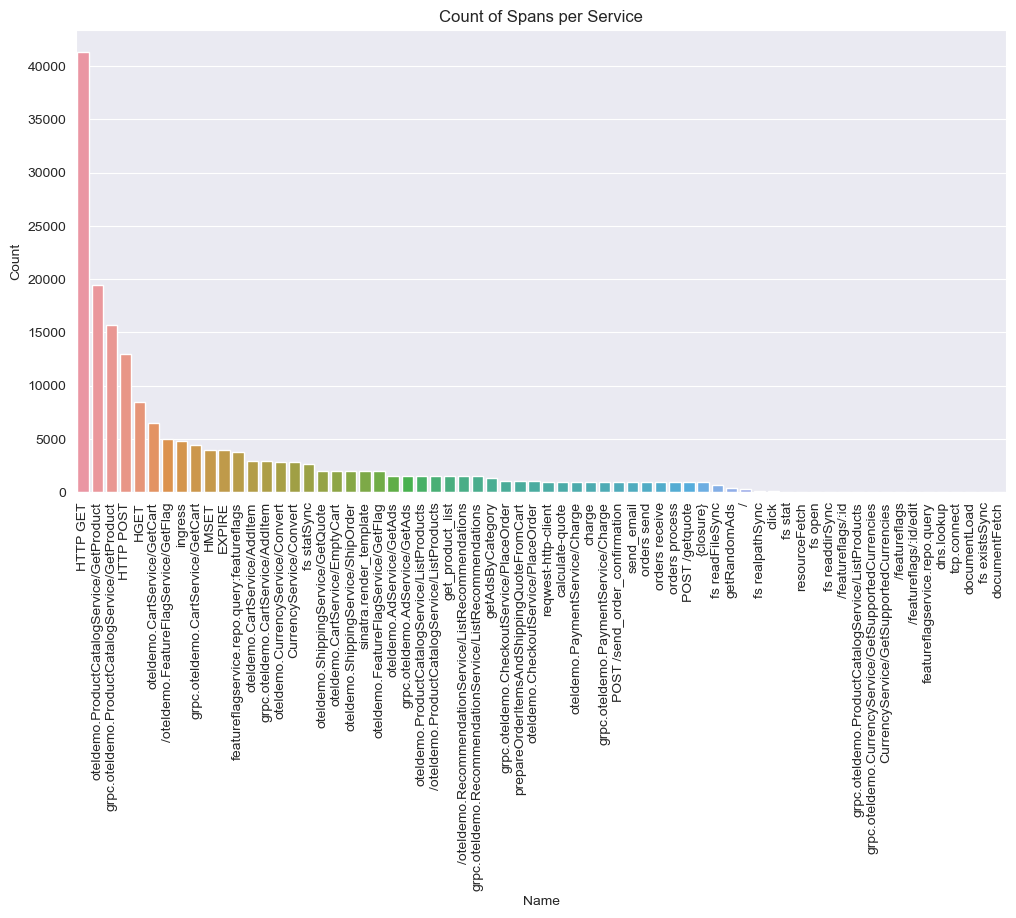

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Name', order=df['Name'].value_counts().index)
plt.title('Count of Spans per Service')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


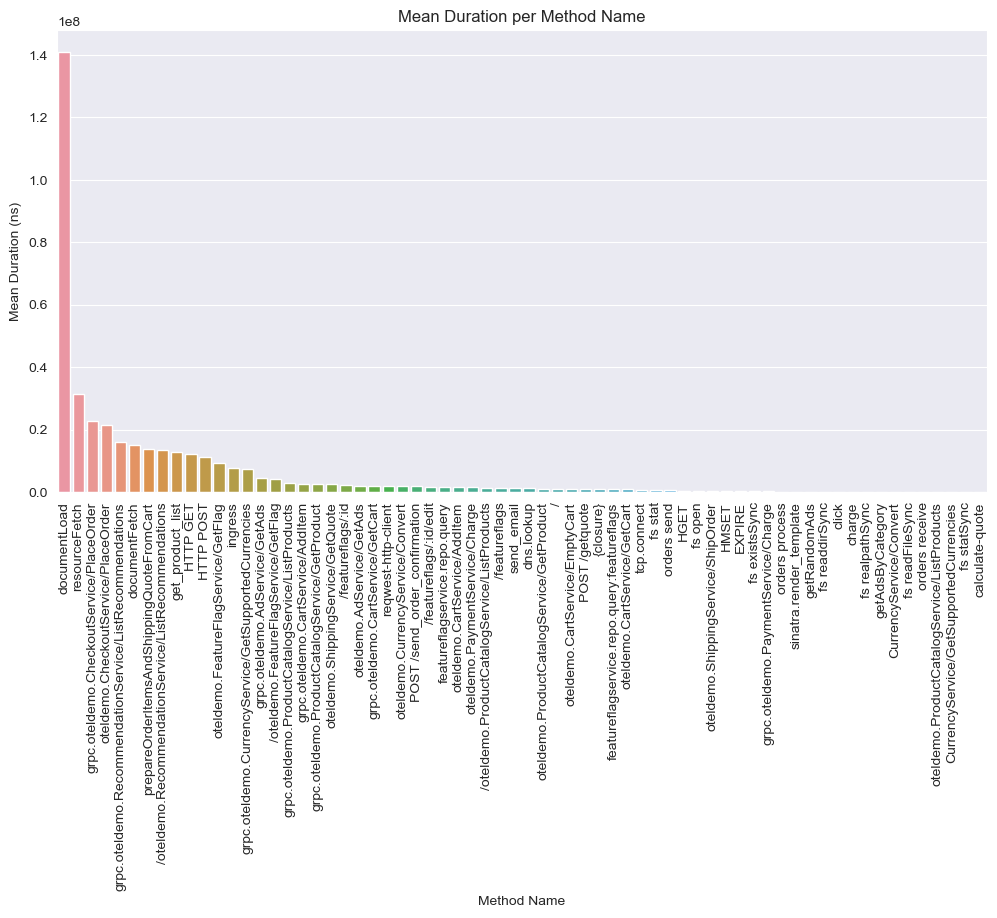

In [13]:
method_duration = df.groupby('Name')['durationNano'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=method_duration, x='Name', y='durationNano', order=method_duration.sort_values(by='durationNano', ascending=False)['Name'])
plt.title('Mean Duration per Method Name')
plt.xlabel('Method Name')
plt.ylabel('Mean Duration (ns)')
plt.xticks(rotation=90)
plt.show()


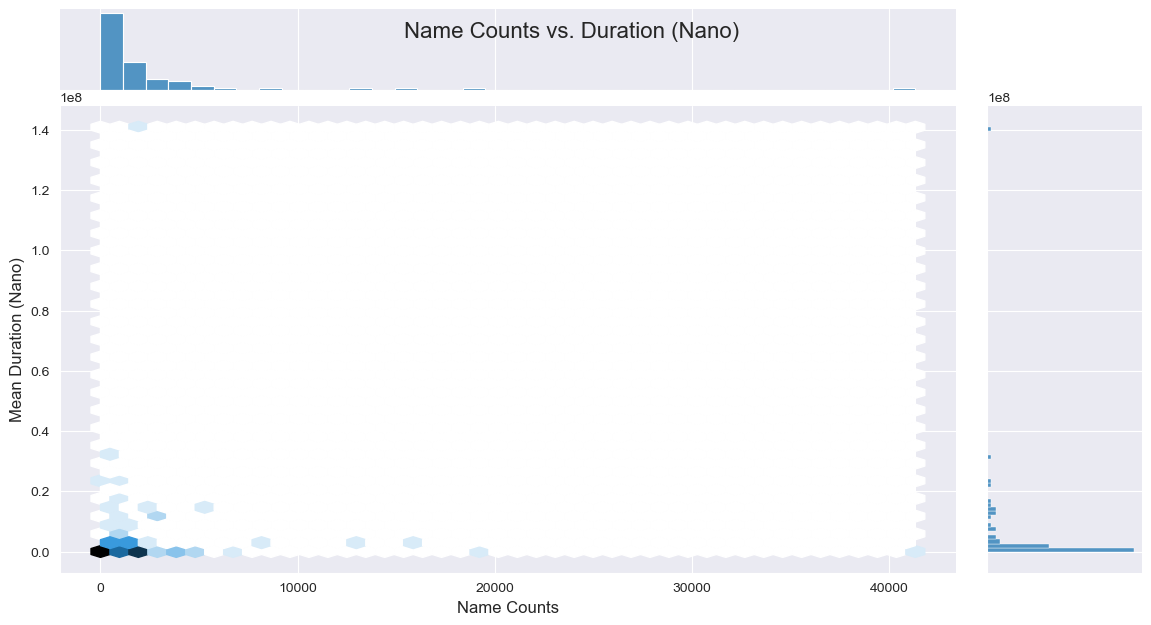

In [14]:
p = sns.jointplot(x=df['Name'].value_counts().values,y=method_duration['durationNano'].values,kind='hex')
p.fig.set_size_inches(12, 6)
p.fig.suptitle('Name Counts vs. Duration (Nano)', fontsize=16)
p.fig.subplots_adjust(top=1)
p.set_axis_labels('Name Counts', 'Mean Duration (Nano)', fontsize=12)
plt.show()

## Duration over Time with different granularity

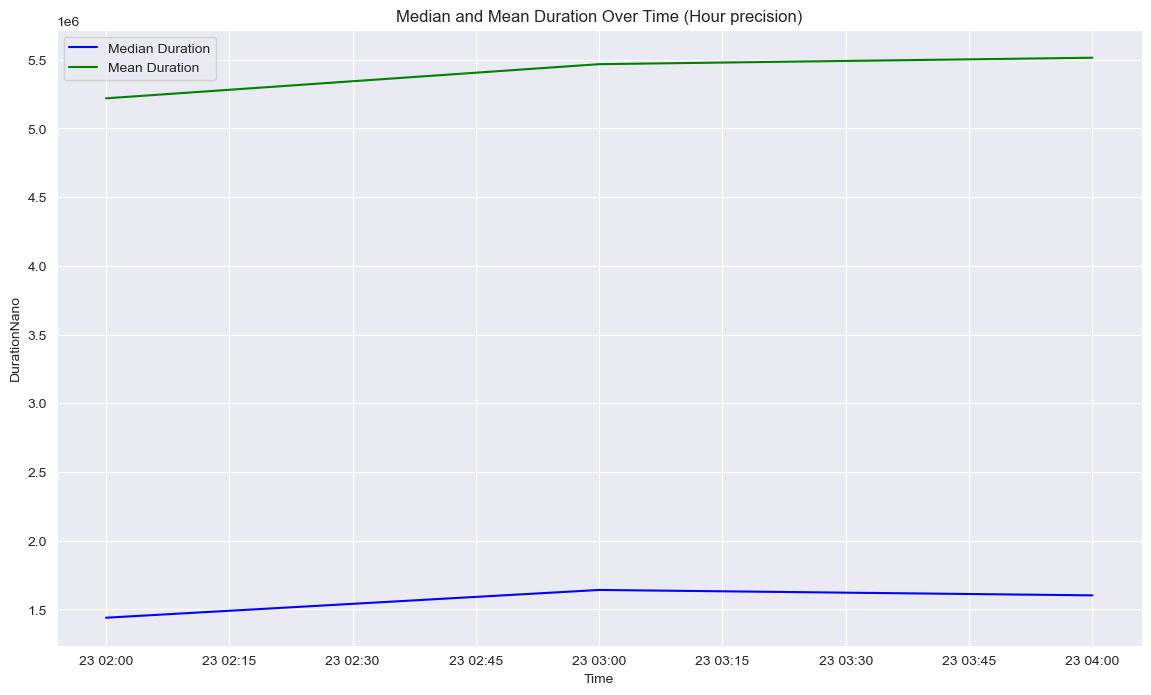

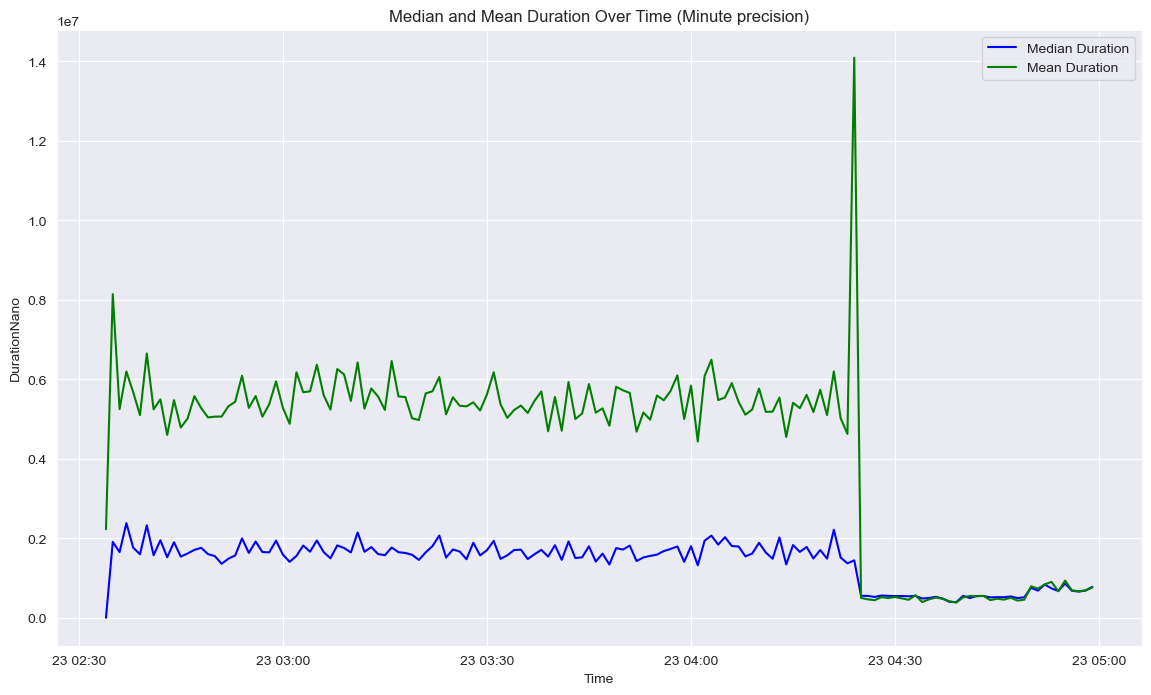

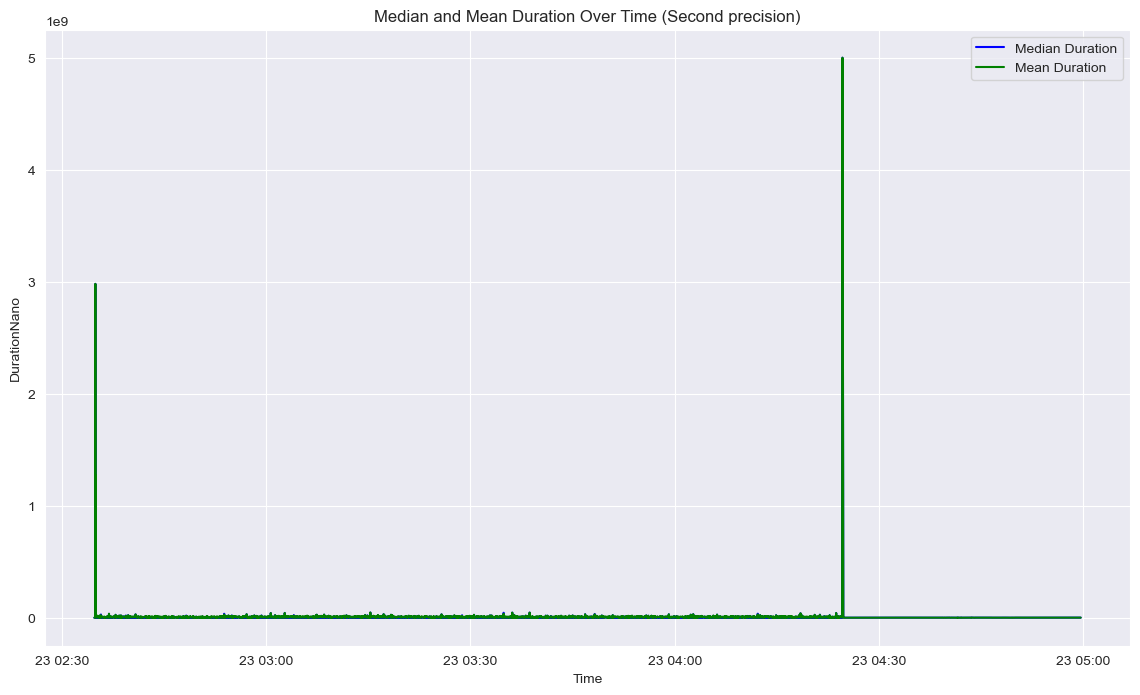

In [15]:
data = df.copy()
for gran in ('Hour','Minute','Second'):
    
    if gran == 'Hour':
        time = '%H'
    elif gran == 'Minute':
        time = '%H:%M'
    else:
        time = '%H:%M:%S'
        
    data['Time_min'] = data['Timestamp'].apply(lambda x: x.strftime("%Y-%m-%d "+time))
    transform_data = data.groupby('Time_min')['durationNano'].agg(['median', 'mean']).reset_index()
    transform_data['Time_min'] = pd.to_datetime(transform_data['Time_min'])
    
    plt.figure(figsize=(14, 8))
    plt.plot(transform_data['Time_min'], transform_data['median'], label='Median Duration', color='blue')
    plt.plot(transform_data['Time_min'], transform_data['mean'], label='Mean Duration', color='green')
        
    plt.title(f'Median and Mean Duration Over Time ({gran} precision)')
    plt.xlabel('Time')
    plt.ylabel('DurationNano')
    plt.legend()
    plt.show()

## Transactions count plot with time (minute and hourly)

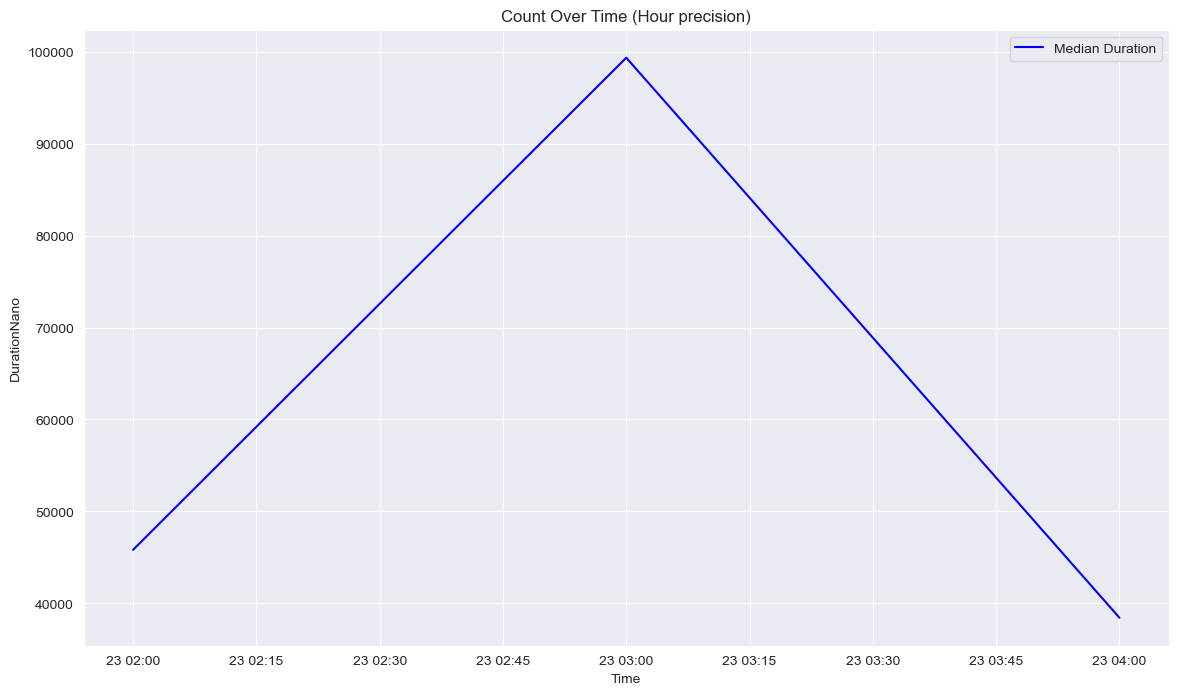

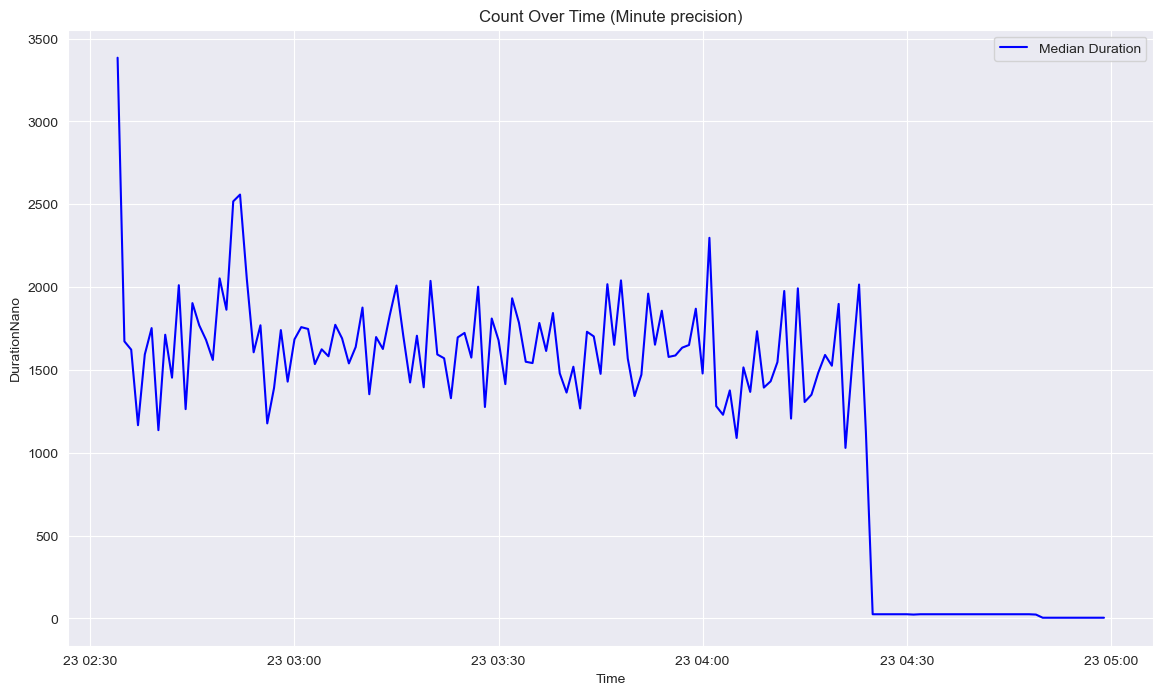

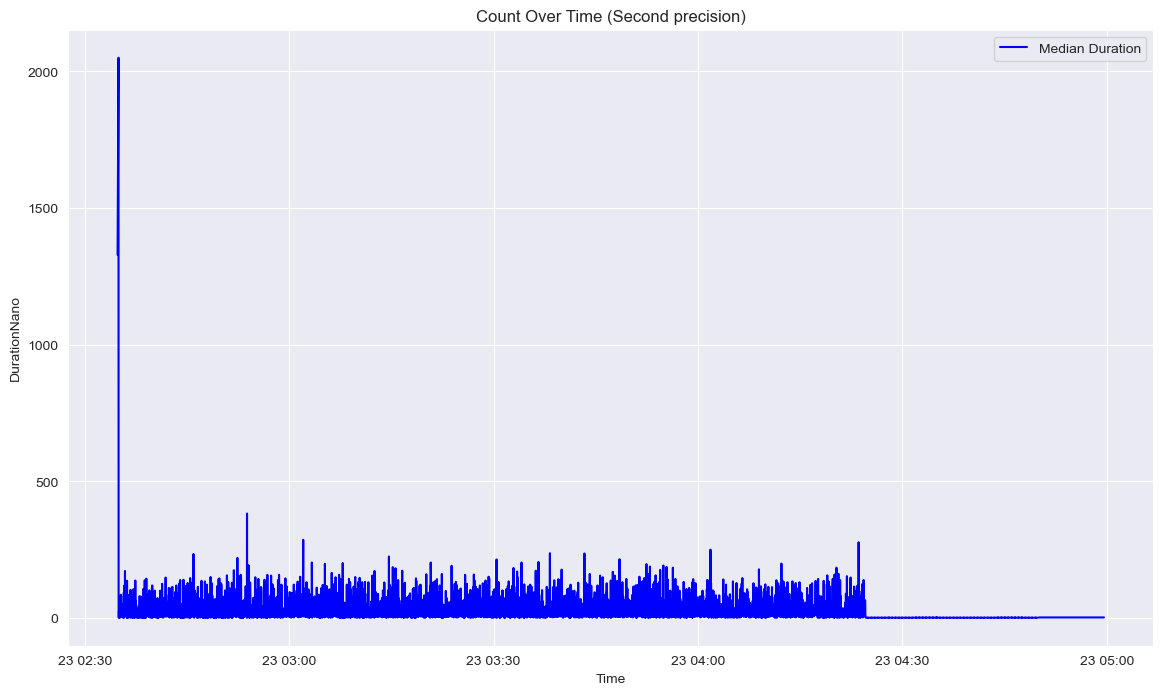

In [16]:
data = df.copy()
for gran in ('Hour','Minute','Second'):
    
    if gran == 'Hour':
        time = '%H'
    elif gran == 'Minute':
        time = '%H:%M'
    else:
        time = '%H:%M:%S'
        
    data['Time_min'] = data['Timestamp'].apply(lambda x: x.strftime("%Y-%m-%d "+time))
    transform_data = data.groupby('Time_min')['durationNano'].agg('count').reset_index()
    transform_data['Time_min'] = pd.to_datetime(transform_data['Time_min'])
    
    plt.figure(figsize=(14, 8))
    plt.plot(transform_data['Time_min'], transform_data['durationNano'], label='Median Duration', color='blue')
        
    plt.title(f'Count Over Time ({gran} precision)')
    plt.xlabel('Time')
    plt.ylabel('DurationNano')
    plt.legend()
    plt.show()

## Top 10 Services and method:

In [17]:
top_services = service_duration.sort_values(by='durationNano', ascending=False).head(10)
print("Top 10 Services(serviceName) with Highest Mean Durations:")
top_services

Top 10 Services(serviceName) with Highest Mean Durations:


,serviceName,durationNano
11,loadgenerator,1.847588e+07
10,frontend-web,1.305869e+07
15,recommendationservice,9.706576e+06
9,frontend-proxy,7.858884e+06
8,frontend,6.863503e+06
3,checkoutservice,4.100306e+06
13,productcatalogservice,1.673416e+06
16,shippingservice,1.428734e+06
1,adservice,1.399567e+06
6,featureflagservice,1.070550e+06


In [18]:
# Show the top methods with highest mean durations
top_methods = method_duration.sort_values(by='durationNano', ascending=False).head(10)
print("Top 10 Methods(Name) with Highest Mean Durations:")
top_methods

Top 10 Methods(Name) with Highest Mean Durations:


,Name,durationNano
21,documentLoad,1.408501e+08
61,resourceFetch,3.148822e+07
37,grpc.oteldemo.CheckoutService/PlaceOrder,2.267590e+07
51,oteldemo.CheckoutService/PlaceOrder,2.165298e+07
42,grpc.oteldemo.RecommendationService/ListRecomm...,1.618716e+07
20,documentFetch,1.510005e+07
59,prepareOrderItemsAndShippingQuoteFromCart,1.377505e+07
6,/oteldemo.RecommendationService/ListRecommenda...,1.340459e+07
33,get_product_list,1.296276e+07
12,HTTP GET,1.220294e+07


## Total duration for each trace

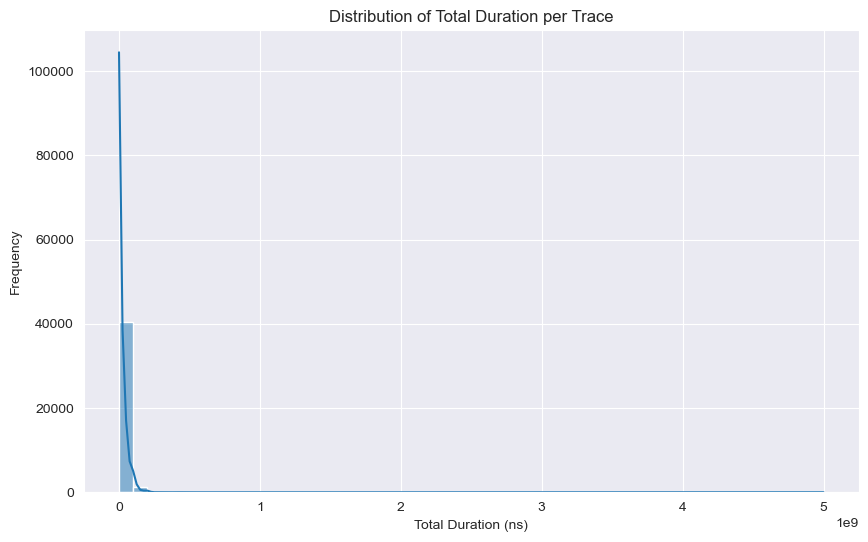

In [19]:
trace_duration = df.groupby('traceID')['durationNano'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(trace_duration['durationNano'], bins=50, kde=True)
plt.title('Distribution of Total Duration per Trace')
plt.xlabel('Total Duration (ns)')
plt.ylabel('Frequency')
plt.show()

## Investigate Parent-Child Relationships

### Distribution of the number of child spans per parent span

Number of unique parent spans: 107233


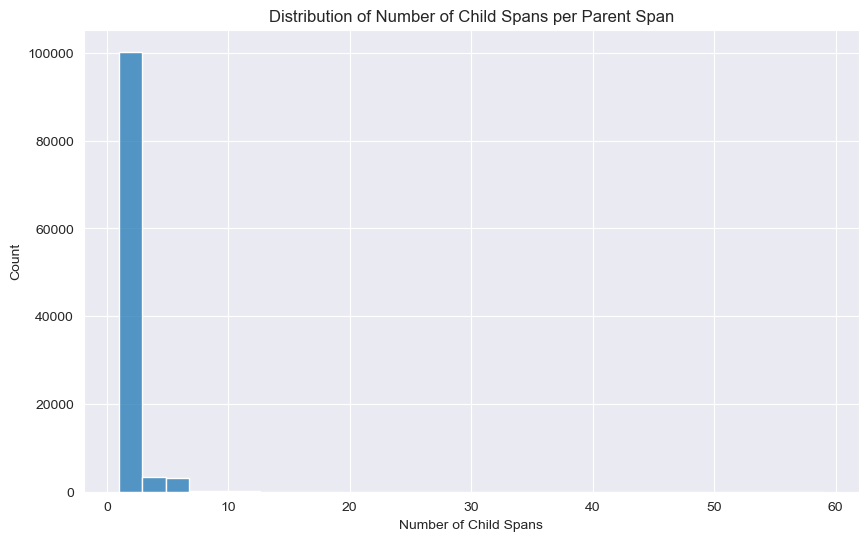

In [20]:
parent_span_count = df['parentSpanID'].nunique()
print(f"Number of unique parent spans: {parent_span_count}")

child_span_counts = df['parentSpanID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(child_span_counts, bins=30)
plt.title('Distribution of Number of Child Spans per Parent Span')
plt.xlabel('Number of Child Spans')
plt.ylabel('Count')
plt.show()


### The relationship between parent span duration and child span duration

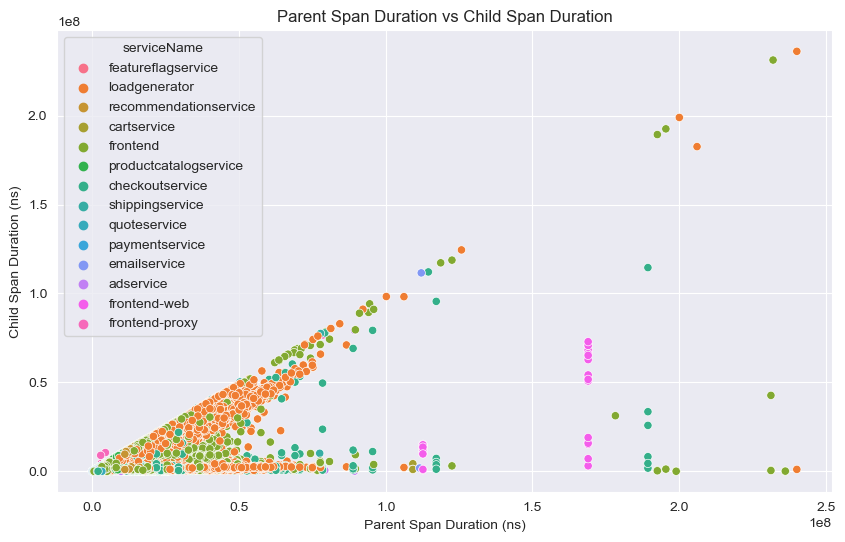

In [21]:
span_hierarchy = df[['spanID', 'parentSpanID', 'durationNano']]
span_hierarchy = span_hierarchy.merge(df[['spanID', 'durationNano','serviceName']], left_on='parentSpanID', right_on='spanID', suffixes=('', '_parent'))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=span_hierarchy, x='durationNano_parent', y='durationNano',hue='serviceName')
plt.title('Parent Span Duration vs Child Span Duration')
plt.xlabel('Parent Span Duration (ns)')
plt.ylabel('Child Span Duration (ns)')
plt.show()

### Distribution of duration across different services and method names

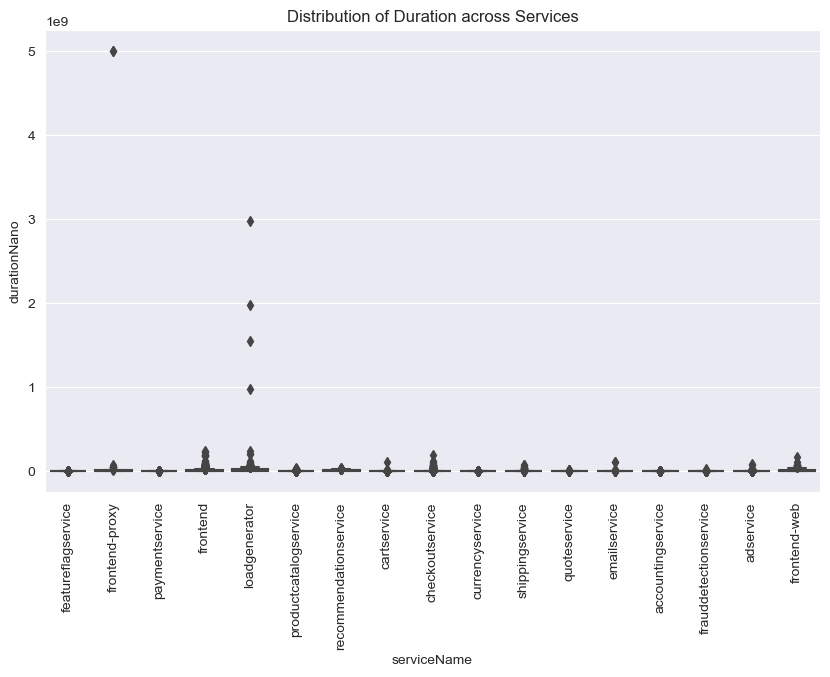

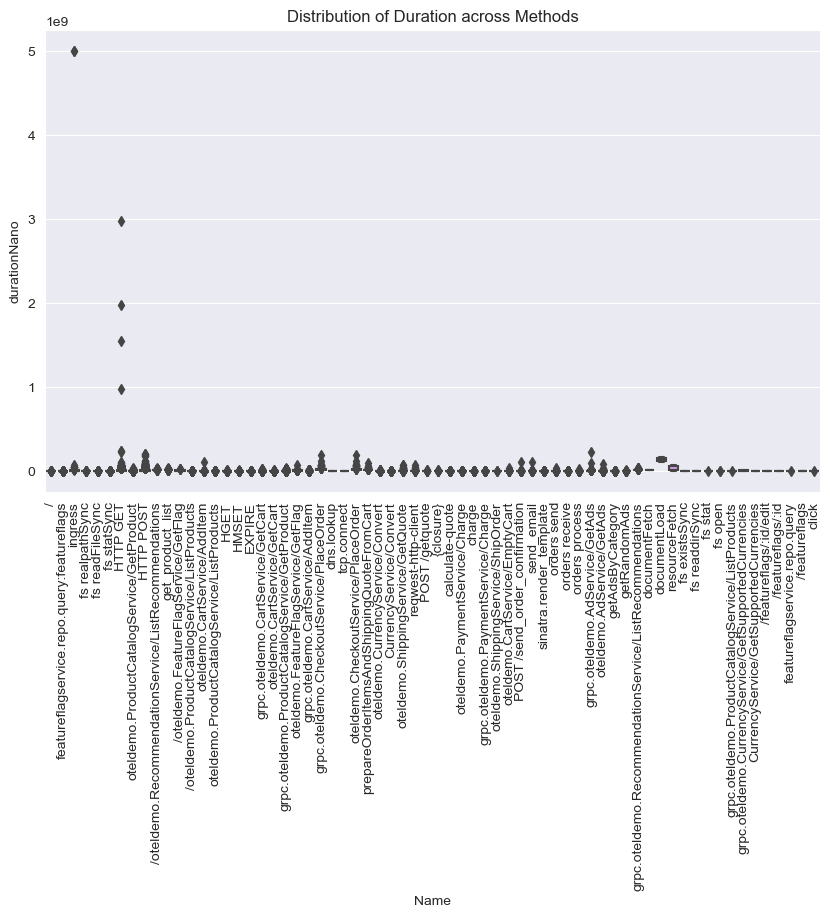

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serviceName', y='durationNano', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Duration across Services')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='durationNano', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Duration across Methods')
plt.show()

### Standard deviation of duration  across different services and method names

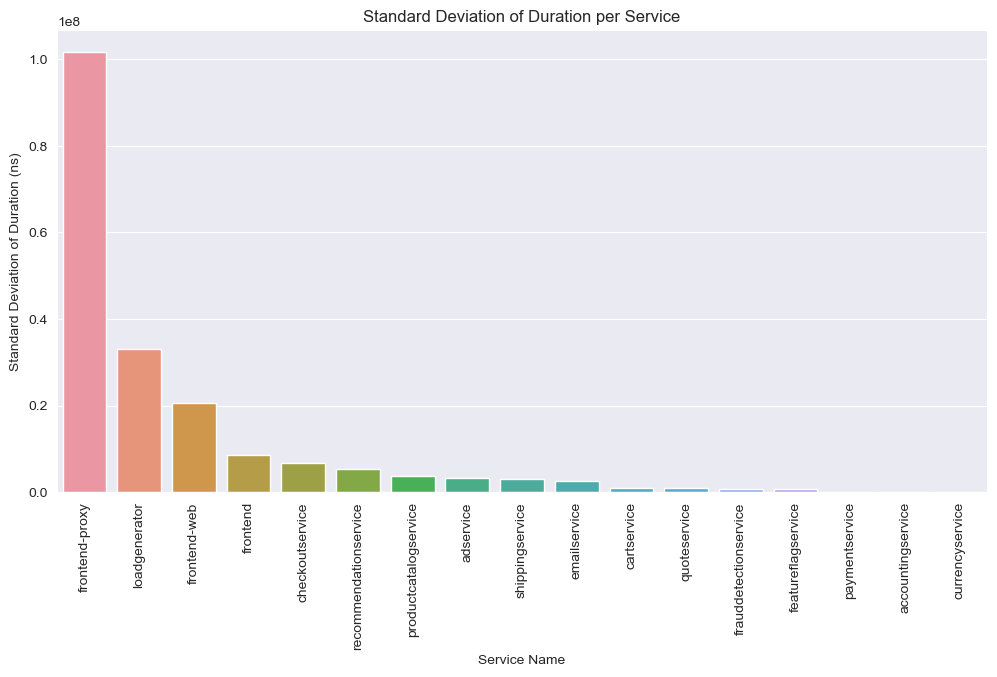

In [23]:
service_duration_std = df.groupby('serviceName')['durationNano'].std().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=service_duration_std, x='serviceName', y='durationNano', order=service_duration_std.sort_values(by='durationNano', ascending=False)['serviceName'])
plt.title('Standard Deviation of Duration per Service')
plt.xlabel('Service Name')
plt.ylabel('Standard Deviation of Duration (ns)')
plt.xticks(rotation=90)
plt.show()

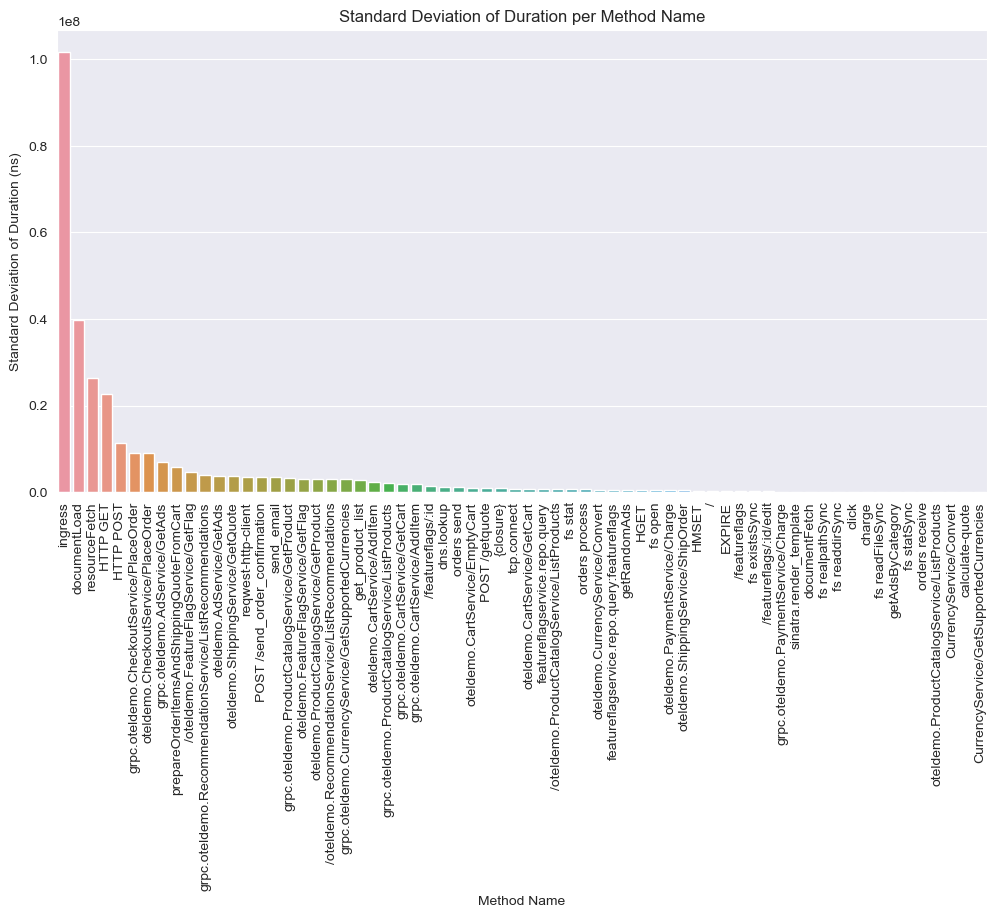

In [24]:
method_duration_std = df.groupby('Name')['durationNano'].std().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=method_duration_std, x='Name', y='durationNano', order=method_duration_std.sort_values(by='durationNano', ascending=False)['Name'])
plt.title('Standard Deviation of Duration per Method Name')
plt.xlabel('Method Name')
plt.ylabel('Standard Deviation of Duration (ns)')
plt.xticks(rotation=90)
plt.show()

### The interactions between parent and child services. 

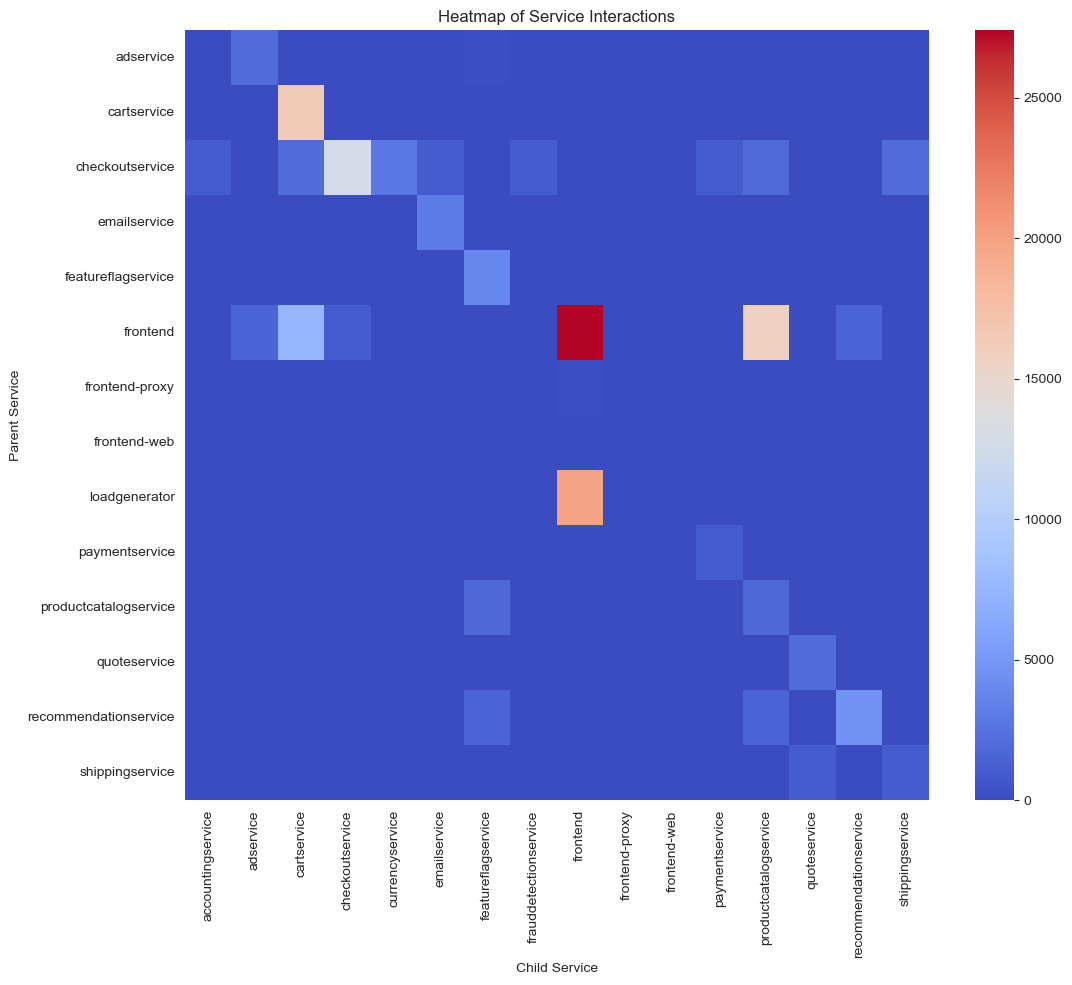

In [25]:
service_interactions = df[['serviceName', 'parentSpanID']].merge(df[['spanID', 'serviceName']], left_on='parentSpanID', right_on='spanID', suffixes=('', '_parent'))

interaction_matrix = pd.crosstab(service_interactions['serviceName_parent'], service_interactions['serviceName'])

interaction_matrix = interaction_matrix[sorted(interaction_matrix.columns)]
interaction_matrix = interaction_matrix.sort_index()
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, cmap='coolwarm')
plt.title('Heatmap of Service Interactions')
plt.xlabel('Child Service')
plt.ylabel('Parent Service')
plt.show()

## Distribution and count of duration for gRpc

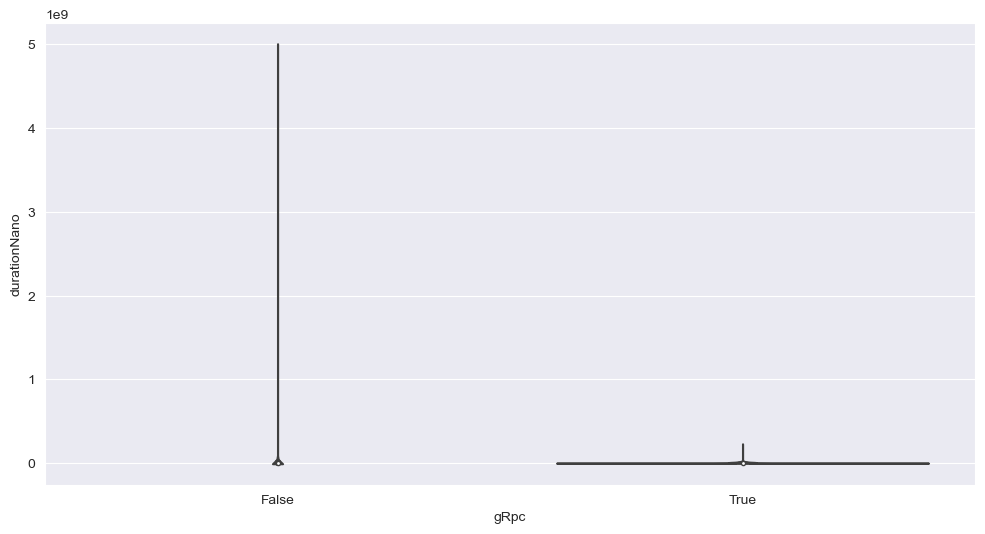

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df,x='gRpc',y='durationNano')
plt.show()

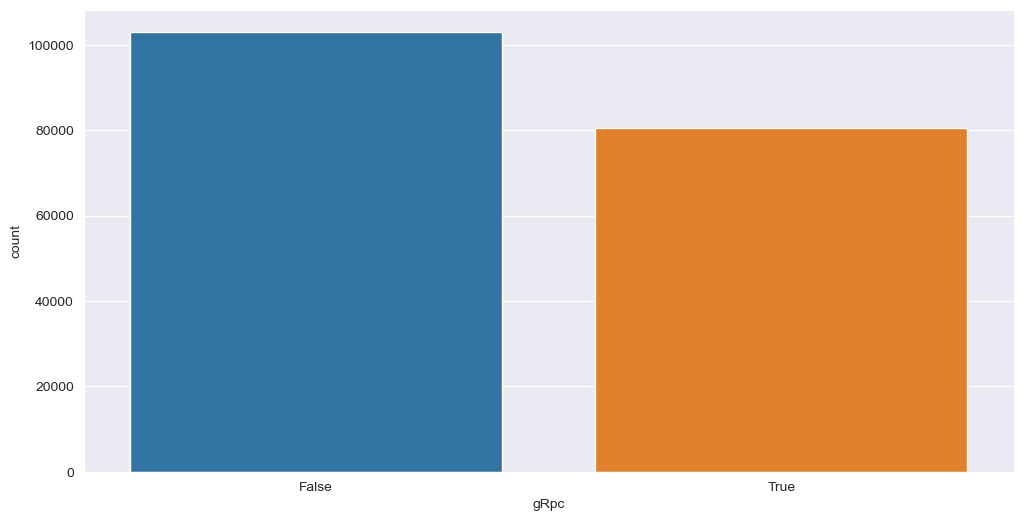

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='gRpc')
plt.show()

# Anomaly detection

## Isolation Forest:

In [35]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=1000,contamination='auto',random_state=42,n_jobs=-1)
iso_forest.fit(df[['durationNano']])
df['anomaly_forest'] = iso_forest.predict(df[['durationNano']])
df['anomaly_forest'] = df['anomaly_forest'].apply(lambda x: 1 if x == -1 else 0)


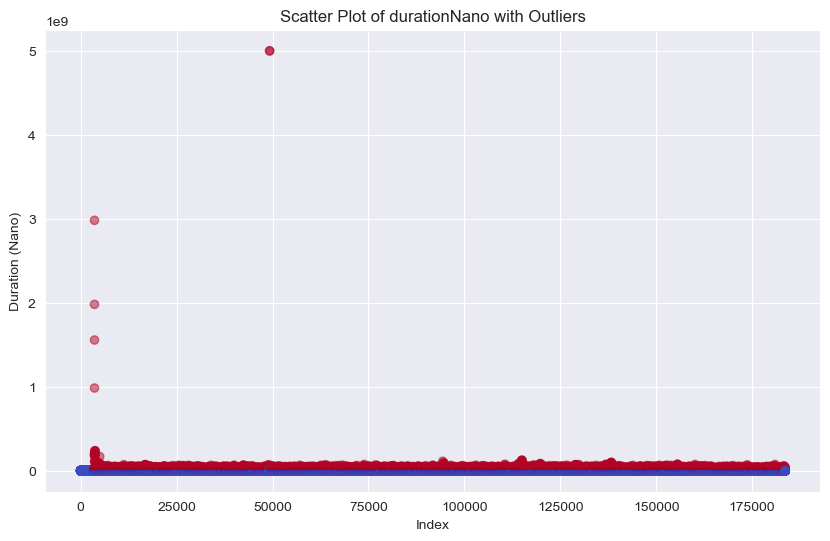

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['durationNano'], c=df['anomaly_forest'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Duration (Nano)')
plt.title('Scatter Plot of durationNano with Outliers')
plt.show()


## Local Outlier Factor (LOF): 

In [30]:
from sklearn.neighbors import LocalOutlierFactor

In [40]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
df['anomaly_lof'] = lof.fit_predict(df[['durationNano']])
df['anomaly_lof'] = df['anomaly_lof'].map({1: 0, -1: 1})  


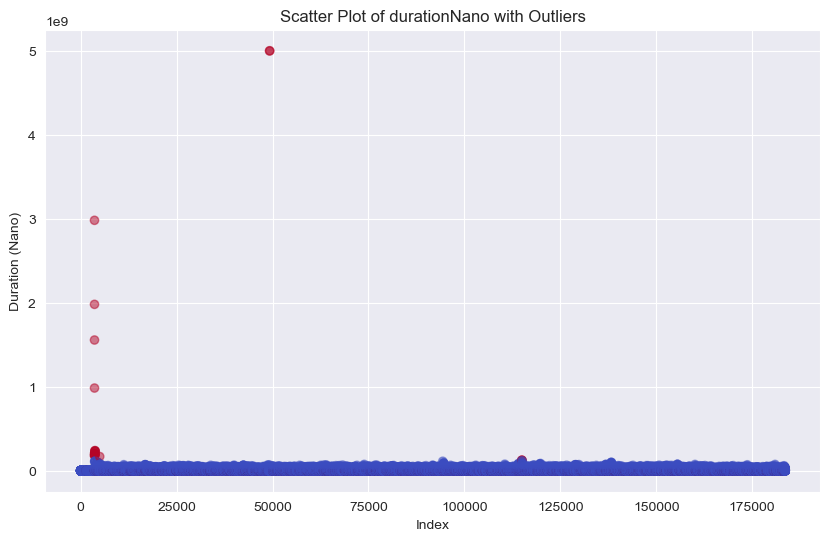

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['durationNano'], c=df['anomaly_lof'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Duration (Nano)')
plt.title('Scatter Plot of durationNano with Outliers')
plt.show()
